# Sympyで方程式を解いてみる

Sympyがまだ面白そうだったのでもっと色々やりました。

とりあえず前に受けた微分方程式の講義ノートを引っ張り出してそこに書いてある練習問題を解いていきました。

微分方程式はすぐ解ける形もあればあれこれ手を焼いてやらないと解けないものもあるようです。すぐに解けないときは小手先の変更(hintを変えるとか)だけではうまくいかないことが多いので、さっさと地道な方法で解いたほうがいいと思います。

この記事はjupyter notebookで書いたのをmarkdownに変換したものです。notebookは[ここ](https://github.com/yuki67/yuki67.github.io/blob/master/non-markdowns/2017-03-25-Sympyで方程式を解いてみる.ipynb)にあります。

In [1]:
# 初期処理
%matplotlib inline
from sympy import *
from sympy.plotting import plot
from IPython.display import display
from  sympy.solvers.ode import *
init_printing()

# デフォルトだと微分方程式を解いたときに誤差関数(error function)を使うのでそれを書き直す関数
def expand_erfs(expr):
    """ 誤差関数を開く """
    return expr.replace(erf, lambda x: 2/sqrt(pi) * Integral(exp(-t**2), (t, 0, x)))\
               .replace(erfi, lambda x: 2/sqrt(pi) * Integral(exp(t**2), (t, 0, x))).simplify()

# 積分定数を潰す関数constantsimp()は積分定数を引数として
# 渡さなければいけないので、C1,C2,...をシンボルとして定義しなければいけない。
# それだとめんどくさいので、積分定数でないシンボルを渡せばすむ関数があると便利。
def constsimp(expr, variable):
    """ variable以外の自由変数をconstantsimp()に渡す """
    return constantsimp(expr, [c for c in ans.free_symbols if c != variable])

x = symbols("x")
a, b, c, t = symbols("a b c t")
y, f, g, P, Q, R = symbols('y f g P Q R', cls=Function)

## 方程式

In [2]:
expr = Eq(x**2+3*x-4)
display(expr, solveset(expr, x)) # solve()という関数もあるがsolveset()が推奨されている

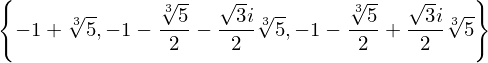

In [3]:
expr = x**3+3*x**2+3*x-4
display(Eq(expr), solveset(expr))

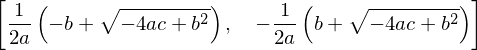

In [4]:
a, b, c = symbols("a b c")
solve(a*x**2+b*x+c, x)

In [5]:
solveset(Gt(x**2, 0), domain=S.Reals)

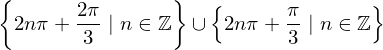

In [6]:
solveset(sin(x) - sqrt(3)/2, domain=S.Reals)

## 微分方程式

### 変数分離型

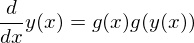

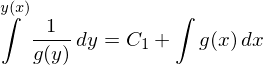

In [7]:
eq = Eq(Derivative(y(x)), g(x)*g(y(x)))
display(eq, dsolve(eq, y(x)))

#### 例題: ロジスティック方程式

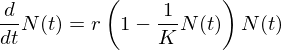

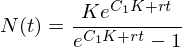

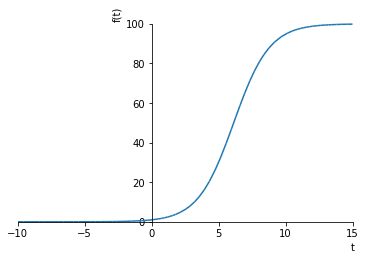

In [8]:
# シンボルを定義
t, r, K = symbols("t r K")
N = symbols("N", cls=Function)
# ロジスティック方程式を定義
eq = Eq(Derivative(N(t)), r*(1-(N(t)/K))*N(t))
display(eq)
# 一般解を求める
ans = dsolve(eq)
display(ans)

# 特殊化する
args = [(K, 100), (r, 0.75)]
init_val = 1.0
func = ans.rhs.subs(args)
# 初期値を方程式の解として求める
c = solve(Eq(func.subs([(t, 0)]), init_val), domain=S.Reals)
# プロットする
C1 = symbols("C1") # 積分定数用のシンボルを定義しなきゃいけないのがめんどくさい
plot(func.subs([(C1, c[0])]), (t, -10, 15))

### LiouVille(リウビル)型

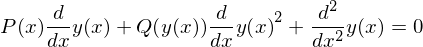

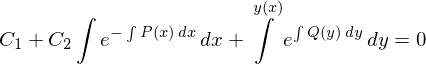

In [9]:
LiouVille = Eq(y(x).diff(x,2) + P(x)*y(x).diff(x) + Q(y(x))*y(x).diff(x)**2)
display(LiouVille, dsolve(LiouVille, y(x), hint="Liouville"))

#### 例題

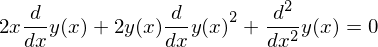

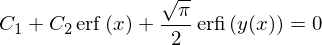

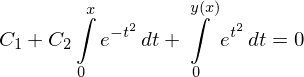

In [10]:
eq = Eq(y(x).diff(x,2) + 2*x*y(x).diff(x) + 2*y(x)*y(x).diff(x) ** 2)
ans = dsolve(eq, hint="Liouville")
display(eq, ans, constsimp(expand_erfs(ans), x))

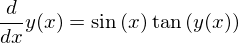

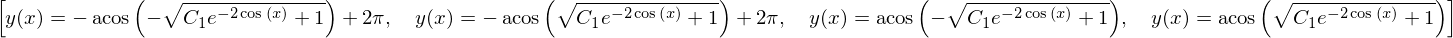

In [11]:
eq = Eq(y(x).diff(x), sin(x)*tan(y(x)))
display(eq, dsolve(eq, y(x)))

### 同次型

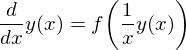

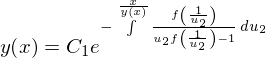

In [12]:
eq = Eq(y(x).diff(x), f(y(x)/x))
display(eq, dsolve(eq, y(x)))

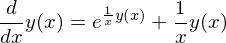

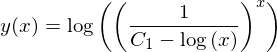

In [13]:
eq = Eq(y(x).diff(x) , exp(y(x)/x) + y(x)/x)
display(eq, dsolve(eq))

### 分数型

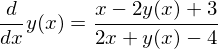

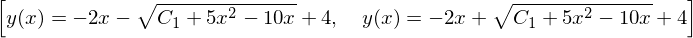

In [14]:
eq = Eq(y(x).diff(x), (x-2*y(x)+3)/(2*x+y(x)-4))
display(eq, dsolve(eq))

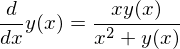

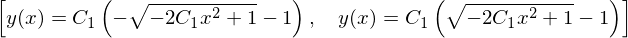

In [15]:
eq = Eq(y(x).diff(x), x*y(x)/(x**2+y(x)))
display(eq, dsolve(eq, hint="lie_group"))

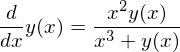

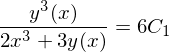

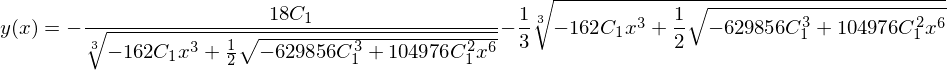

In [16]:
# 自動で解けないのもあるので、そのときは答を代入する
eq = Eq(y(x).diff(x), x**2*y(x)/(x**3+y(x)))
# この答えは手で解いたもの
ans_implicit = Eq(y(x)**3/(2*x**3+3*y(x)), 6*C1)
# 実数解だけ取る(虚数解でも成り立つだろうけどとりあえず無視)
ans = solve(ans_implicit, y(x))[0]
# これがTrueなのでans_implicitが正しいと分かる
display(eq, ans_implicit, Eq(y(x), ans), eq.subs([(y(x), ans)]).doit().simplify())

### 定数変化法

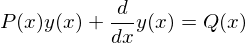

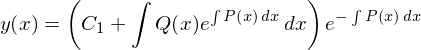

In [17]:
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x))
display(eq, dsolve(eq, y(x), hint="almost_linear"))

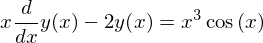

In [18]:
eq = Eq(x*y(x).diff(x) - 2*y(x), x**3*cos(x))
display(eq, dsolve(eq, y(x)))

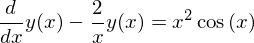

In [19]:
# 一般解から解いてみる
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x))
display(eq.subs([(P(x), -2/x), (Q(x), x**2*cos(x))]),
        dsolve(eq, hint="almost_linear").subs([(P(x), -2/x), (Q(x), x**2*cos(x))]).doit())

## Bernoulli(ベルヌーイ)型

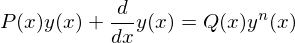

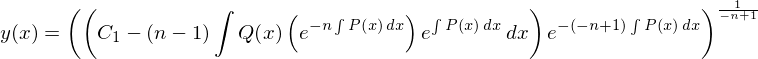

In [20]:
n = symbols("n")
eq = Eq(y(x).diff(x) + P(x)*y(x), Q(x)*y(x)**n)
display(eq, dsolve(eq, hint="Bernoulli"))

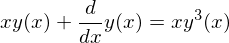

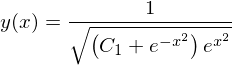

In [21]:
eq = Eq(y(x).diff(x)+x*y(x), x*y(x)**3)
display(eq, dsolve(eq, hint="Bernoulli"))

## Riccati(リッカチ)型

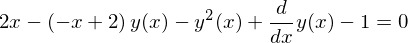

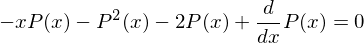

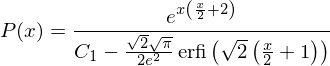

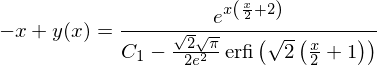

In [22]:
# 自動で解くのは無理っぽい
eq = Eq(y(x).diff(x) - y(x)**2 - (2-x)*y(x) + 2*x - 1)
spec_ans = x
display(eq.subs([(y(x), spec_ans)]).doit().simplify())
bern = eq.subs([(y(x), P(x)+spec_ans)]).doit().simplify()
ans = dsolve(bern, hint="Bernoulli")
display(eq, bern, ans, ans.subs([(P(x), y(x)-x)]))

## Clairaur(クレロー)型

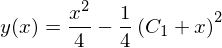

In [23]:
eq = Eq(y(x), x*y(x).diff(x) - y(x).diff(x)**2)
dsolve(eq)

## 減衰振動

In [24]:
m, k, u = symbols("m k u")
eq = Eq(m*y(x).diff(x,2), -k*y(x) - u * y(x).diff(x))
dsolve(eq)

### 定数係数斉次線形

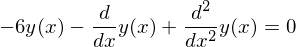

In [25]:
# 一番簡単なやつ
eq = Eq(y(x).diff(x,2) - y(x).diff(x) - 6*y(x))
display(eq, dsolve(eq))

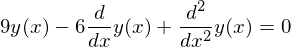

In [26]:
# 重解のパターン
eq = Eq(y(x).diff(x, 2) - 6*y(x).diff(x) + 9*y(x))
display(eq, dsolve(eq))

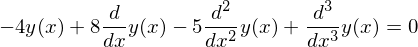

In [27]:
eq = Eq(y(x).diff(x,3) - 5*y(x).diff(x,2) + 8*y(x).diff(x) - 4*y(x))
display(eq, dsolve(eq))

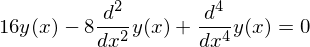

In [28]:
eq = Eq(y(x).diff(x,4) - 8*y(x).diff(x,2) + 16*y(x))
display(eq, dsolve(eq))

### 定数係数非斉次線形

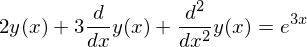

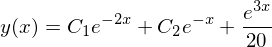

In [29]:
eq = Eq(y(x).diff(x, 2) + 3*y(x).diff(x) + 2*y(x), exp(3*x))
display(eq, dsolve(eq))

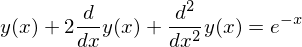

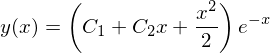

In [30]:
eq = Eq(y(x).diff(x, 2) + 2*y(x).diff(x) + y(x), exp(-x))
display(eq, dsolve(eq))

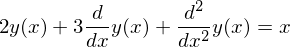

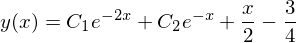

In [31]:
eq = Eq(y(x).diff(x, 2) + 3*y(x).diff(x) + 2*y(x), x)
display(eq, dsolve(eq))

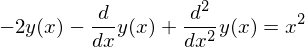

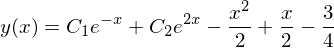

In [32]:
eq = Eq(y(x).diff(x, 2) - y(x).diff(x) - 2*y(x), x**2)
display(eq, dsolve(eq))

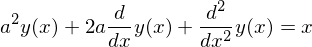

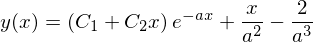

In [33]:
eq = Eq(y(x).diff(x, 2) + 2*a*y(x).diff(x) + a**2*y(x), x)
display(eq, dsolve(eq))